In [ ]:
"""
   Copyright (C) 2023 ETH Zurich. All rights reserved.
   Author: Sergei Vostrikov, ETH Zurich
   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at
       http://www.apache.org/licenses/LICENSE-2.0
   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

   SPDX-License-Identifier: Apache-2.0
"""

# If you are not familiar with Jupyter Notebooks, please first check online tutorials such as https://realpython.com/jupyter-notebook-introduction/#creating-a-notebook

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

### Test of Matplotlib Widget Backend

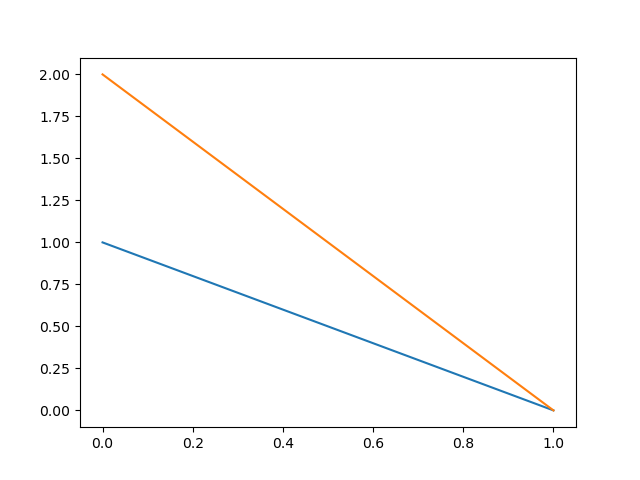

In [2]:
import matplotlib.pyplot as plt

plt.plot([[1, 2], [0, 0]])

#### If you do not see a figure above,  try to restart the kernel.
#### If it does not help, check the installation of **ipympl** library.

## Run WULPUS GUI Demo

## Prepare TX/RX configurations for HW

In [4]:
from wulpus.rx_tx_conf import WulpusRxTxConfigGen
from wulpus.rx_tx_conf_gui import WulpusRxTxConfigGenGUI
from wulpus.uss_conf import WulpusUssConfig, PGA_GAIN
import numpy as np

# # Generate Transmit/Receive configs
# conf_gen = WulpusRxTxConfigGen()

# Generate Transmit/Receive configs using the GUI
conf_gen = WulpusRxTxConfigGenGUI()

display(conf_gen)

WulpusRxTxConfigGenGUI(children=(HBox(children=(Dropdown(description='Config:', layout=Layout(justify_content=…

In [5]:
# # TX and RX active channels IDs (only when not using the GUI)
# conf_gen.add_config([7], [7])
# conf_gen.add_config([0], [6])

tx_confs = conf_gen.get_tx_configs()
rx_confs = conf_gen.get_rx_configs()

print('TX config: ', np.binary_repr(tx_confs[0]))
print('RX config: ', np.binary_repr(rx_confs[0]))

# Create US subsystem configuration
uss_conf = WulpusUssConfig(num_acqs=100,
                           dc_dc_turn_on_time=6400,
                           start_hv_mux_rx_cnt=4000,
                           meas_period=10550,
                           tx_rx_conf_len=len(tx_confs),
                           tx_configs=tx_confs,
                           rx_configs=rx_confs,
                           rx_gain=PGA_GAIN[-10])

# Change the number of pulses
uss_conf.num_pulses = 2

print("Gain dB: ", uss_conf.rx_gain)

TX config:  1000000000000000
RX config:  100000000000000
Gain dB:  23.6


### Run GUI 
(Check sw/docs/gui_overview.pdf for more information)

WulpusGuiSingleCh(children=(VBox(children=(HBox(children=(VBox(children=(Button(description='Scan ports', styl…

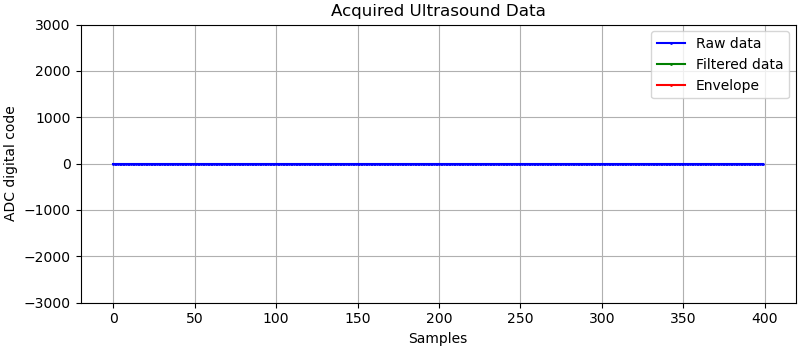

In [6]:
%matplotlib widget
from wulpus.gui import WulpusGuiSingleCh
from wulpus.dongle import WulpusDongle

# Create a dongle object
dongle = WulpusDongle()

# Create a GUI
gui = WulpusGuiSingleCh(dongle, uss_conf, max_vis_fps = 5)

display(gui)